# **FM Assignment - Group 11 (Sector - REFINERIES)**

Group Members:
*   Khush Bhuta (ID - 2022A7PS1333H)
*   Daksh Jain (ID - 2022A7PS0201H)
*   Rushi Patel (ID - 2022A7PS1382H)
*   Srujaan Parhate (ID - 2022A4PS0876H)
*   Tejasvini Goel (ID - 2022A7PS1672H)







Allotted Company - **Bharat Petroleum Corporation Ltd.** (*BPCL.NS*)

Other 5 companies used for Bottom-Up Approach:

1.   Reliance Industries (*RELIANCE.NS*)
2.   Indian Oil Corporation (*IOC.NS*)
3.   Hindustan Petroleum Corp Ltd. (*HINDPETRO.NS*)
4.   Chennai Petroleum Corp Ltd. (*CHENNPETRO.NS*)
5.   Mangalore Refineries and Petrochemicals Ltd. (*MRPL.NS*)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
tickers = ['RELIANCE.NS','IOC.NS','HINDPETRO.NS','CHENNPETRO.NS','MRPL.NS','^NSEI']
start_date = '2019-04-01'
end_date = '2024-04-01'

In [ ]:
data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date, progress = False, interval = '1mo')['Adj Close']

# **BOTTOM UP APPROACH** (Calculating Beta Using Regression for the 5 Companies)

Calculating the NIFTY 50 returns separately

In [ ]:
nifty_df = pd.DataFrame()
nifty_df['NIFTY_returns'] = np.log(data['^NSEI']/data['^NSEI'].shift(1))
nifty_df.dropna(inplace = True)

The logarithmic NIFTY returns were consistently positive, and tanked only in 2020 due to COVID-19

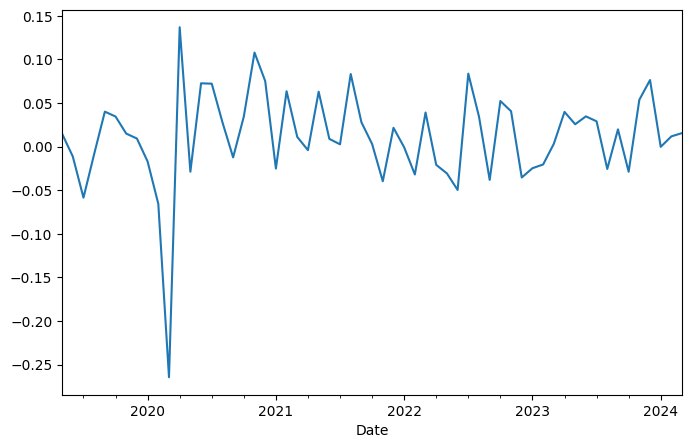

In [ ]:
nifty_df['NIFTY_returns'].plot(figsize = (8,5))
plt.show()

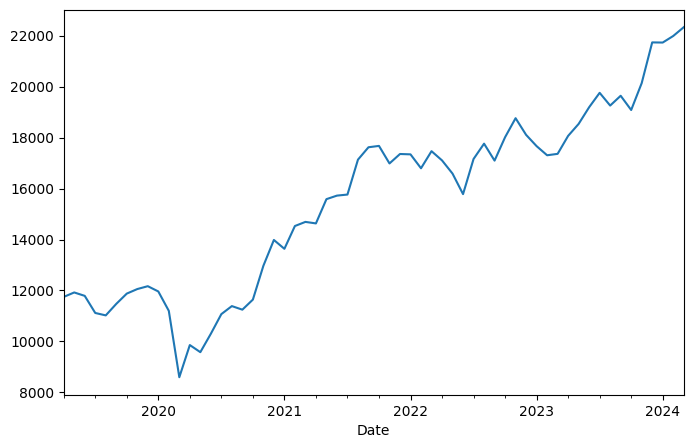

In [ ]:
data['^NSEI'].plot(figsize = (8,5))
plt.show()

Finding the monthly returns for the 5 companies in the REFINERIES Sector

In [ ]:
reliance_df = pd.DataFrame()
reliance_df['reliance_returns'] = np.log(data['RELIANCE.NS']/data['RELIANCE.NS'].shift(1))
reliance_df.dropna(inplace = True)

IOC_df = pd.DataFrame()
IOC_df['IOC_returns'] = np.log(data['IOC.NS']/data['IOC.NS'].shift(1))
IOC_df.dropna(inplace = True)

hindpetro_df = pd.DataFrame()
hindpetro_df['hindpetro_returns'] = np.log(data['HINDPETRO.NS']/data['HINDPETRO.NS'].shift(1))
hindpetro_df.dropna(inplace = True)

chennpetro_df = pd.DataFrame()
chennpetro_df['chennpetro_returns'] = np.log(data['CHENNPETRO.NS']/data['CHENNPETRO.NS'].shift(1))
chennpetro_df.dropna(inplace = True)

mrpl_df = pd.DataFrame()
mrpl_df['mrpl_returns'] = np.log(data['MRPL.NS']/data['MRPL.NS'].shift(1))
mrpl_df.dropna(inplace = True)

In [ ]:
returns = pd.merge(nifty_df,reliance_df,how = 'inner', on = 'Date')
x = returns['NIFTY_returns']
y = returns['reliance_returns']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)
results = model.fit()

print(results.summary())
reliance_beta = results.params[1]

                            OLS Regression Results                            
Dep. Variable:       reliance_returns   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     47.14
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           5.32e-09
Time:                        13:52:57   Log-Likelihood:                 84.798
No. Observations:                  59   AIC:                            -165.6
Df Residuals:                      57   BIC:                            -161.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0047      0.008      0.600

<ipython-input-8-b0d3b729301d>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reliance_beta = results.params[1]


In [ ]:
print(reliance_beta)

0.9445464142736821


In [ ]:
returns = pd.merge(nifty_df,IOC_df,how = 'inner', on = 'Date')
x = returns['NIFTY_returns']
y = returns['IOC_returns']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)
results = model.fit()

print(results.summary())
IOC_beta = results.params[1]

                            OLS Regression Results                            
Dep. Variable:            IOC_returns   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     39.89
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.34e-08
Time:                        13:52:57   Log-Likelihood:                 74.598
No. Observations:                  59   AIC:                            -145.2
Df Residuals:                      57   BIC:                            -141.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0027      0.009      0.298

<ipython-input-10-39b406f4947a>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  IOC_beta = results.params[1]


In [ ]:
print(IOC_beta)

1.0329043952271055


In [ ]:
returns = pd.merge(nifty_df,hindpetro_df,how = 'inner', on = 'Date')
x = returns['NIFTY_returns']
y = returns['hindpetro_returns']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)
results = model.fit()

print(results.summary())
hindpetro_beta = results.params[1]

                            OLS Regression Results                            
Dep. Variable:      hindpetro_returns   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     24.00
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           8.33e-06
Time:                        13:52:57   Log-Likelihood:                 63.329
No. Observations:                  59   AIC:                            -122.7
Df Residuals:                      57   BIC:                            -118.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.011      0.156

<ipython-input-12-64942474f735>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hindpetro_beta = results.params[1]


In [ ]:
print(hindpetro_beta)

0.9697675651497976


In [ ]:
returns = pd.merge(nifty_df,chennpetro_df,how = 'inner', on = 'Date')
x = returns['NIFTY_returns']
y = returns['chennpetro_returns']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)
results = model.fit()

print(results.summary())
chennpetro_beta = results.params[1]

                            OLS Regression Results                            
Dep. Variable:     chennpetro_returns   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     10.94
Date:                Thu, 07 Nov 2024   Prob (F-statistic):            0.00163
Time:                        13:52:57   Log-Likelihood:                 23.001
No. Observations:                  59   AIC:                            -42.00
Df Residuals:                      57   BIC:                            -37.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0088      0.022      0.396

<ipython-input-14-d71526f153c1>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chennpetro_beta = results.params[1]


In [ ]:
print(chennpetro_beta)

1.2969427759863317


In [ ]:
returns = pd.merge(nifty_df,mrpl_df,how = 'inner', on = 'Date')
x = returns['NIFTY_returns']
y = returns['mrpl_returns']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)
results = model.fit()

print(results.summary())
mrpl_beta = results.params[1]

                            OLS Regression Results                            
Dep. Variable:           mrpl_returns   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     15.44
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           0.000232
Time:                        13:52:57   Log-Likelihood:                 30.558
No. Observations:                  59   AIC:                            -57.12
Df Residuals:                      57   BIC:                            -52.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0045      0.019      0.229

<ipython-input-16-c76131c76b31>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mrpl_beta = results.params[1]


In [ ]:
print(mrpl_beta)

1.3556715480348165


In [ ]:
print('The beta of reliance is: ' ,reliance_beta)
print('The beta of IOC is: ' ,IOC_beta)
print('The beta of hindpetro is: ' ,hindpetro_beta)
print('The beta of chennpetro is: ' ,chennpetro_beta)
print('The beta of mrpl is: ' ,mrpl_beta)

The beta of reliance is:  0.9445464142736821
The beta of IOC is:  1.0329043952271055
The beta of hindpetro is:  0.9697675651497976
The beta of chennpetro is:  1.2969427759863317
The beta of mrpl is:  1.3556715480348165


# **TOP-DOWN Approach**

In [ ]:
BPCL_df = pd.DataFrame()
temp_df = yf.download('BPCL.NS', start = '2019-04-01', end = '2024-04-01', progress = False, interval = '1mo')
BPCL_df['BPCL_returns'] = np.log(temp_df['Adj Close']/temp_df['Adj Close'].shift(1))
BPCL_df.dropna(inplace = True)

Price chart for BPCL

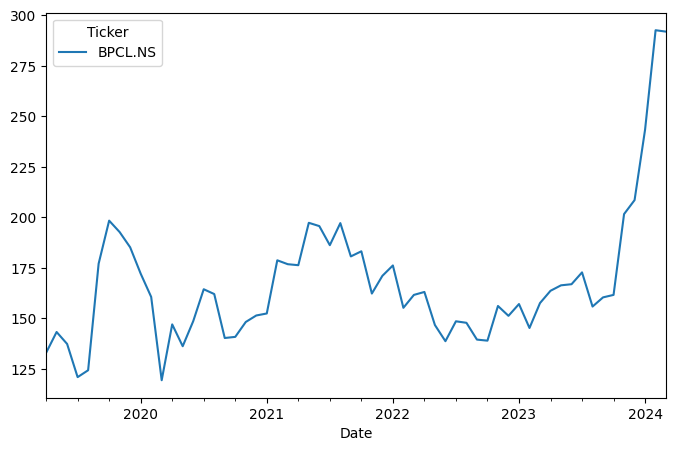

In [ ]:
temp_df['Adj Close'].plot(figsize = (8,5))
plt.show()

Finding the Beta of BPCL (our allotted company) using OLS Regression

In [ ]:
returns_td = pd.merge(nifty_df,BPCL_df,how = 'inner', on = 'Date')
returns_td.head()

,NIFTY_returns,BPCL_returns
Date,,
2019-05-01 00:00:00+00:00,0.014757,0.074794
2019-06-01 00:00:00+00:00,-0.011298,-0.042161
2019-07-01 00:00:00+00:00,-0.058589,-0.127417
2019-08-01 00:00:00+00:00,-0.008559,0.027829
2019-09-01 00:00:00+00:00,0.040116,0.353818


In [ ]:
returns_td.describe()

,NIFTY_returns,BPCL_returns
count,59.000000,59.000000
mean,0.010883,0.013334
std,0.055823,0.102135
min,-0.264569,-0.296674
25%,-0.020723,-0.045823
50%,0.011765,0.007617
75%,0.039495,0.054805
max,0.136976,0.353818


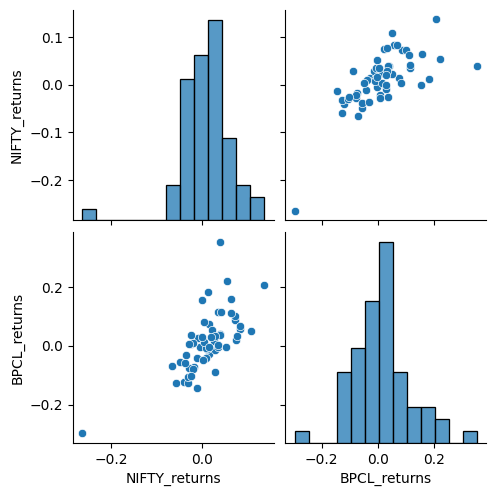

In [ ]:
sns.pairplot(returns_td)
plt.show()

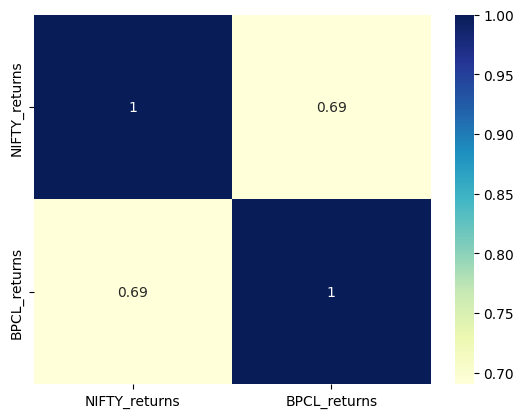

In [ ]:
sns.heatmap(returns_td.corr(), annot = True, cmap = "YlGnBu")
plt.show()

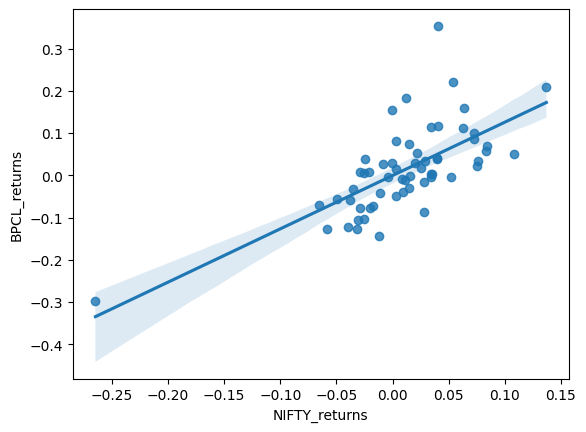

In [ ]:
#This is the Regression Line (Security Characteristic Line) obtained by regressing the company returns against the market returns.
sns.regplot(x = nifty_df, y = BPCL_df, data = returns_td)
plt.show()

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
x = returns['NIFTY_returns']
y = BPCL_df['BPCL_returns']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)
results = model.fit()

print(results.summary())
BPCL_beta = results.params[1]

                            OLS Regression Results                            
Dep. Variable:           BPCL_returns   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     51.89
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.46e-09
Time:                        13:53:03   Log-Likelihood:                 70.487
No. Observations:                  59   AIC:                            -137.0
Df Residuals:                      57   BIC:                            -132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0004      0.010     -0.042

<ipython-input-26-05181e267799>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  BPCL_beta = results.params[1]


In [ ]:
print(BPCL_beta)

1.2629725344986942


In [ ]:
risk_free_rate = 0.06973
# annualizing the returns
expected_market_return = returns['NIFTY_returns'].mean()*12
annualized_return = expected_market_return - risk_free_rate

In [ ]:
print('The value of Rm =', annualized_return*100,'%')

The value of Rm = 6.0865884552756695 %


In [ ]:
cost_of_equity_capital = risk_free_rate + BPCL_beta*annualized_return
print("Cost of equity capital: ", cost_of_equity_capital*100, '%')

Cost of equity capital:  14.660194047810005 %


Here, we can observe that the BPCL Beta = 1.263 @ 5% significance (since the p-value is < 0.05).

The risk-free rate = 6.973%

Annualized market return = 6.087%

Cost of equity capital = 14.66%

Finding **Statistical Significance** of the Linear Regression results

<ipython-input-31-3f1d1b463225>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


,0
count,5.900000e+01
mean,8.644215e-18
std,7.389690e-02
min,-1.281386e-01
25%,-5.024656e-02
50%,-9.290137e-03
75%,3.576027e-02
max,3.035628e-01


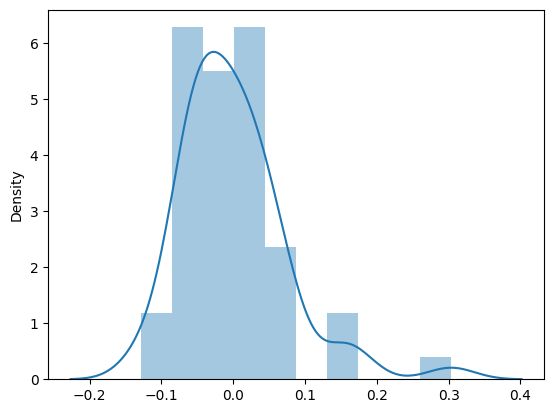

In [ ]:
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
# Checking for Homoskedasticity of errors (Assumption requirement for Linear Regression)
# Performing White's Test

from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,results.model.exog)

labels = ['Test Statistic', 'Test Statistic P-Value', 'F-Statistic', 'F-Test P-Value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 0.509724628646088, 'Test Statistic P-Value': 0.7750232002092041, 'F-Statistic': 0.2440113251557792, 'F-Test P-Value': 0.7843074179750216}


Both p-values are high (significantly higher than a typical threshold of 0.05). This implies that:

*   There is insufficient evidence to reject the null hypothesis of homoskedasticity. In other words, the test suggests that the variance of the residuals is constant across levels of the independent variables.

*   **No heteroskedasticity is detected in the residuals based on these results.**

Since both p-values are large (above 0.05), we can reasonably conclude that the residuals in our model appear to be homoskedastic.

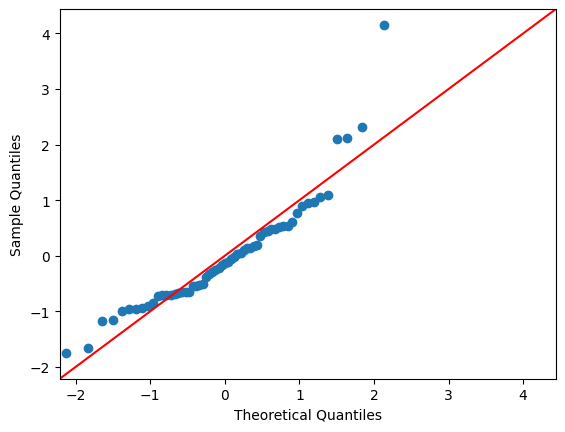

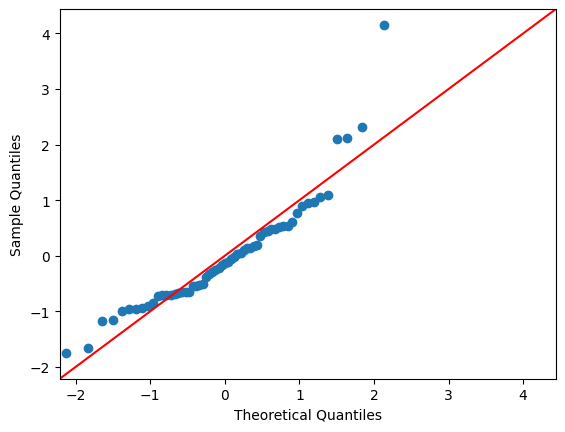

In [ ]:
sm.qqplot(results.resid,line = '45', fit = True, dist = stats.norm)

In [ ]:
stats.normaltest(results.resid)

NormaltestResult(statistic=27.477106475703806, pvalue=1.0799959813018194e-06)

We also observe that since we are plotting the
data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, with some points not exactly lying on the line.

Here we observe from the test statistic value being high, that there is strong deviation from Normality.

The very low p-value suggests strong evidence against the NULL hypothesis of Normality.